## 1. IMDB DATASET ANALYSIS

In [1]:
import pandas as pd
import sqlite3

In [2]:
#connect to the database
path = "im.db"
conn = sqlite3.connect(path)


In [3]:
#show list of all the tables
imdb = pd.read_sql( """
                 SELECT *
                 FROM sqlite_master
                 """
 , conn
                 )
imdb[imdb['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [4]:
#select and check the contents of the entire 'movie_basics' table
movie_basics_query = """ SELECT * 
                         FROM movie_basics;
                         """
pd.read_sql(movie_basics_query, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
# select and check the contents of the entire 'movie_ratings' table
movie_rating_query = """ SELECT * 
                         FROM movie_ratings;
                         """
pd.read_sql(movie_rating_query, conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## joining the tables and cleaning the data ( filtering)¶

In [6]:
#We create an inner join for the two tables
#will create an inner join on 'movie_id' to merge the data
#Also will filter the data to meet certain criteria
#data some part of the cleaning will also happen in the same query 
query = """ SELECT
                  movie_basics.movie_id,
                  movie_basics.primary_title,
                  movie_basics.start_year,
                  movie_basics.runtime_minutes,
                  movie_basics.genres,
                  movie_ratings.averagerating,
                  movie_ratings.numvotes
            FROM movie_basics
            JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
            WHERE movie_basics.start_year >= 2010 AND movie_ratings.numvotes > 1000 AND movie_basics.genres IS NOT NULL;
            """

imdb = pd.read_sql(query, conn).head(10)


## 2.MOVIE GROSS DATASET

In [7]:
#import necesarry libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#load the dataset
movie_gross = pd.read_csv('bom.movie_gross.csv')

In [9]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

## clean the data 

In [11]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
#change the foreign gross column to a float datatype
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].astype(str).str.replace(r'[\$,]', '', regex=True)

#Convert the cleaned strings to float (invalid values become NaN)
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')


In [13]:
movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [14]:
# dropping the rows with missing values in the specified columns
# we also create a new dataframe after dropping the missing values
movie_gross = movie_gross.dropna(subset=['domestic_gross', 'foreign_gross', 'studio'])
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [15]:
# after cleaning the dropping the rows with missing values we check again to see if there is any column with missing values
movie_gross.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [16]:
# check for sum of duplicated rows
movie_gross.duplicated().sum()


0

## 3.MOVIE BUDGET DATASET

In [17]:
#load the csv dataset
movie_budget = pd.read_csv('tn.movie_budgets.csv')

In [18]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
movie_budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

## data cleaning


In [20]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [21]:
# we change the datatypes of the specified columns to float datatype
dollar_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
# Convert to string in case values are mixed types
for col in dollar_cols:
    movie_budget[col] = movie_budget[col].astype(str)
    
    # Remove dollar signs and commas
    movie_budget[col] = movie_budget[col].str.replace(r'[\$,]', '', regex=True)
    
    # Convert to float
    movie_budget[col] = pd.to_numeric(movie_budget[col], errors='coerce')

In [22]:
#check for sum of missing values in each column
movie_budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [23]:
#since there are no columns with missing values we do some other analysis
# convert release date to datetime 
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'])


In [24]:
movie_budget['release_year'] = pd.to_datetime(movie_budget['release_date']).dt.year


In [25]:
# filter to get modern movies from the year 2010
movie_budget= movie_budget[movie_budget['release_date'].dt.year >= 2010]

In [26]:
# create another column called profit 
# calculate the profit
movie_budget['profit'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220
...,...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000,0,0,2014,-15000
5771,72,2015-05-19,Family Motocross,10000,0,0,2015,-10000
5772,73,2012-01-13,Newlyweds,9000,4584,4584,2012,-4416
5777,78,2018-12-31,Red 11,7000,0,0,2018,-7000


In [27]:
movie_budget['ROI'] = (movie_budget['worldwide_gross'] - movie_budget['production_budget']) / movie_budget['production_budget']

## merging the datasets

In [28]:
# then merge the dataset at the title and year
merged = pd.merge(movie_gross, movie_budget, how='inner',
         left_on=['title', 'year'],
         right_on=['movie', 'release_year']
    
)


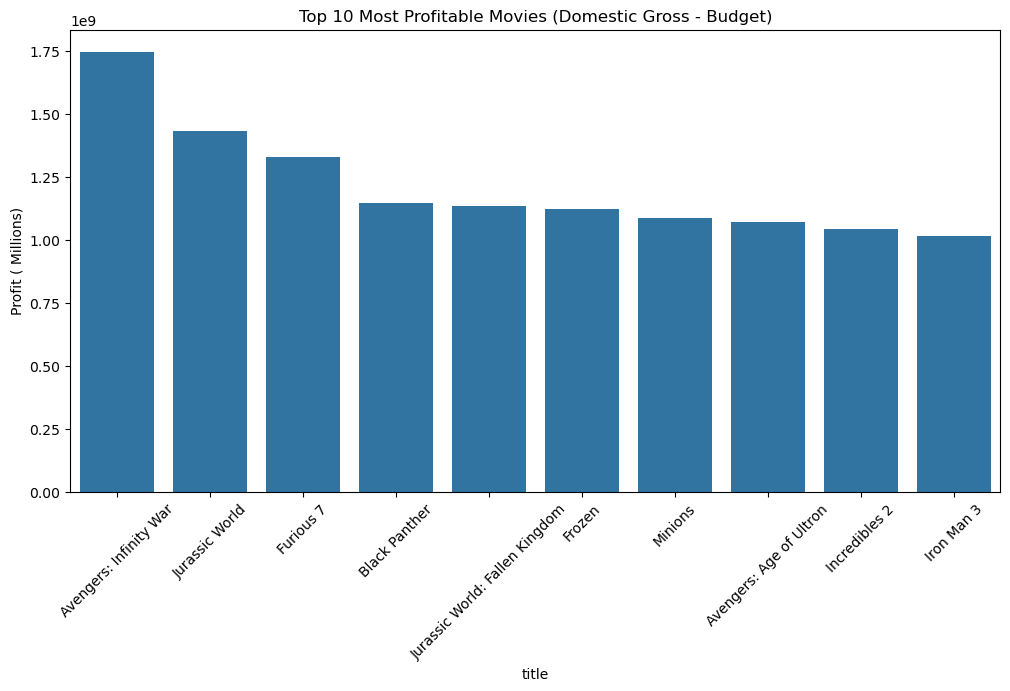

In [29]:
#want to identify which movies gave the best returns on investments
merged['profit'] = merged['worldwide_gross'] - merged['production_budget']
top_profit = merged.nlargest(10, 'profit')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_profit, x='title', y='profit')
plt.title("Top 10 Most Profitable Movies (Domestic Gross - Budget)")
plt.xticks(rotation=45)
plt.ylabel("Profit ( Millions)")
plt.show()
# franchise films have dominated as having given the best returns

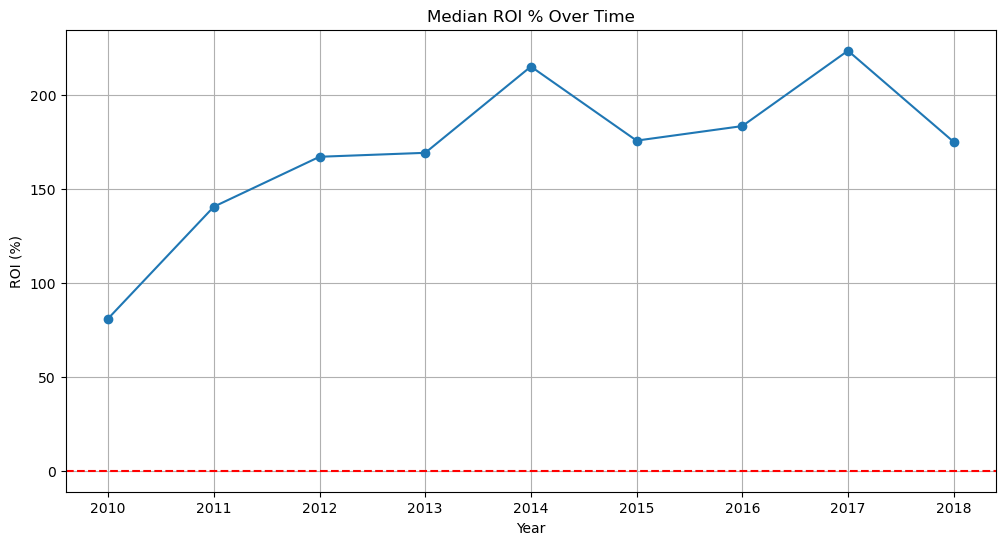

In [30]:
# check the profitability rate of movies over time
merged['roi_percentage'] = (merged['profit'] / merged['production_budget']) * 100
yearly_roi = merged.groupby('year')['roi_percentage'].median()

plt.figure(figsize=(12, 6))
yearly_roi.plot(marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title("Median ROI % Over Time")
plt.ylabel("ROI (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()
# most movies have been profitable over the last few years
#but there are  few dips that may have ocurred during industry downturns

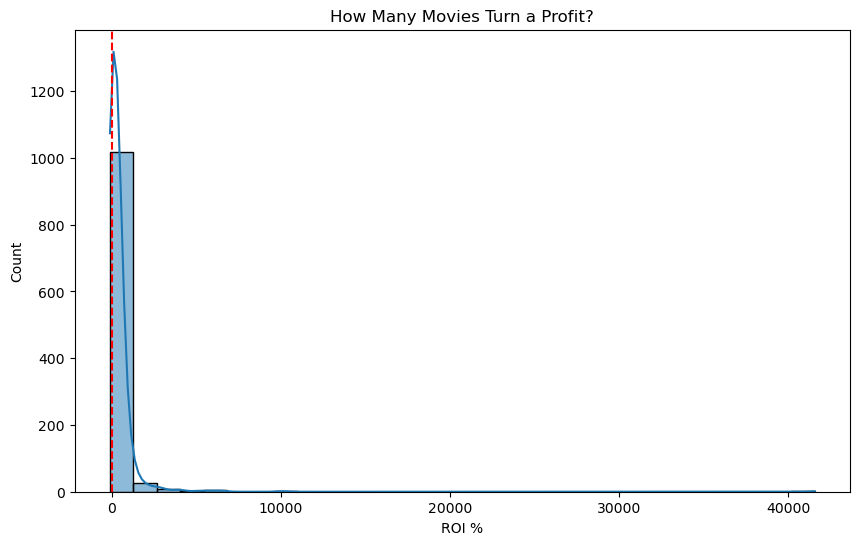

In [31]:
#profitability distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged['roi_percentage'], bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("How Many Movies Turn a Profit?")
plt.xlabel("ROI %")
plt.show()
#most movies are on the right side of the redline that means that are profitable ones

In [32]:
merged.to_csv('movie_analysis.csv', index=False)